# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")


# Display the data table for preview
study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
print(len(study_data_complete))

1893


In [12]:
print(type(study_data_complete))

<class 'pandas.core.frame.DataFrame'>


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_ids

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [22]:
print(len(duplicate_mouse_ids))

13


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_study_data_complete = study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False
clean_study_data_complete = study_data_complete.loc[study_data_complete["Mouse ID"] != "g989"]
clean_study_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [21]:
print(type(clean_study_data_complete))

<class 'pandas.core.frame.DataFrame'>


In [24]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete['Mouse ID'].unique())

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
veriances = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sda = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_table_df = pd.DataFrame ({"Mean Tumor Volume":means,
                            "Median Tumor Vloume":medians,
                            "Tumor Volume Variance":veriances,
                            "Tumor Volume Std. Dev.":sda,
                            "Tumor Volume Std. Err.":sems})

In [28]:
summary_table_df

,Mean Tumor Volume,Median Tumor Vloume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_study_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

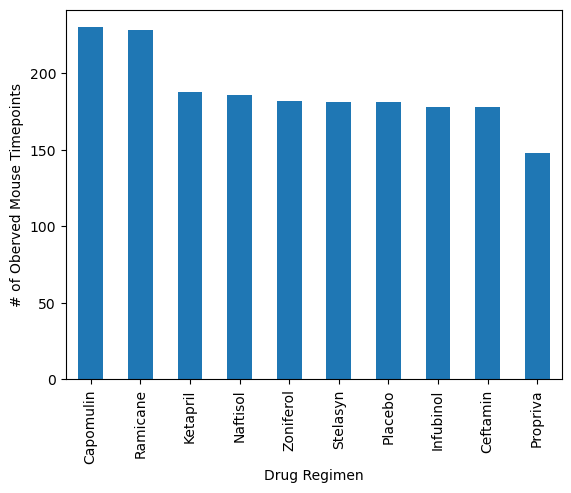

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count = clean_study_data_complete['Drug Regimen'].value_counts()
count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Oberved Mouse Timepoints")
plt.show()


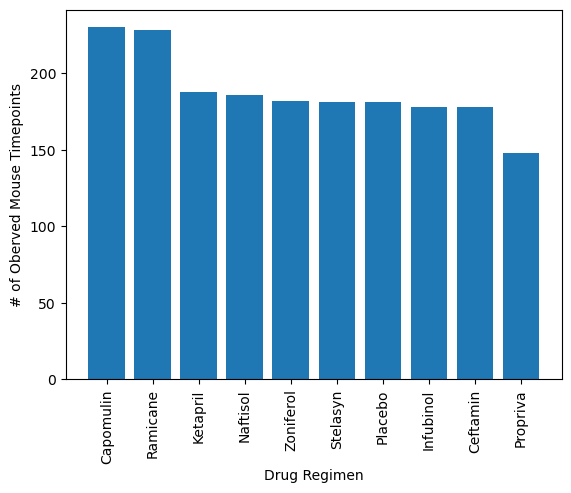

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count = clean_study_data_complete['Drug Regimen'].value_counts()
plt.bar(count.index.values,count.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Oberved Mouse Timepoints")
plt.show()

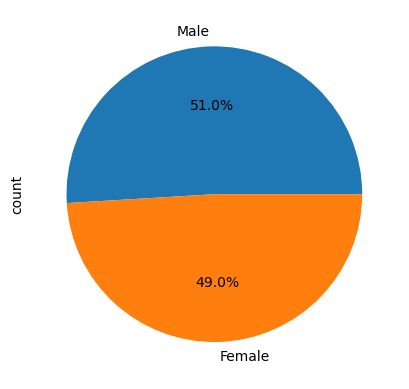

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count = clean_study_data_complete.Sex.value_counts()
count.plot(kind="pie",autopct='%1.1f%%')
plt.show()

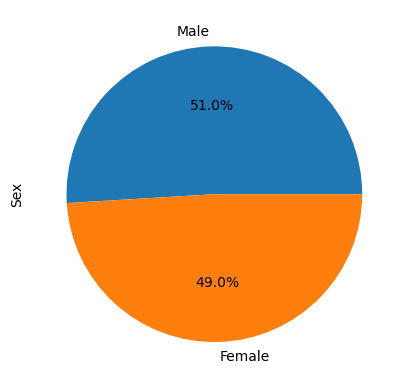

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = clean_study_data_complete.Sex.value_counts()
plt.pie(count.values,labels=count.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_study_data_complete.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_study_data_complete, on=['Mouse ID', 'Timepoint'], how='left')
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [193]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
print(study_data_complete.head())

# List of treatment regimens to analyze
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = study_data_complete.loc[study_data_complete["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Append tumor volumes to the list for plotting
    tumor_vol_list.append(final_tumor_vol)
    
    # Calculate quartiles
    quartiles = final_tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(f"{drug} treatment:")
    print(f"Lower quartile: {lowerq}")
    print(f"Upper quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Potential outliers: {outliers}\n")


# Put treatments into a list for for loop (and later for plot labels)
#treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#treatment_list2 = ['Capomulin']
# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for drug in treatment_list:
    
    #final_tumor_vol = merged_data.loc[(merged_data["Drug Regimen"] == drug),["Tumor Volume (mm3)"]]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #final_tumor_vol = merged_data.loc, merged_data["drug Regimen"] == drug,["Tumor Volume (mm3)"]
    
    # add subset 
    #tumor_vol_list.append(final_tumor_vol)

    # Determine outliers using upper and lower bounds
    #quartiles = final_tumor_vol.quantile([.25,.5,.75])
    
    #quartiles2 = quartiles.copy()
    #quartiles2.reset_index(inplace=True)

    #lowerq = quartiles[0.25]
    #lowerq = quartiles2.loc[(quartiles2["index"] == 0.25),["Tumor Volume (mm3)"]]["Tumor Volume (mm3)"]
    
    #upperq = quantile[0.75]
    #upperq = quartiles2.loc[(quartiles2["index"] == 0.75),["Tumor Volume (mm3)"]]["Tumor Volume (mm3)"]

    #print(upperq)
   

    #iqr = upperq - lowerq
    
    #print(iqr)
    #lower_bound = lowerq - (1.5*iqr)
    #upper_bound = upperq + (1.5*iqr)
    #outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    #print(f'({drug } potential outliers:{outliers})')


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  
Capomulin treatment:
Lower quartile: 37.685932865
Upper quartile: 45.0
IQR: 7.314067135000002
Lower bound: 26.714832162499995
Upper bound: 55.9711007025
Potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64

Ramicane treatment:
Lower quartile: 36.674634585
Upper quartile: 45.0
IQR: 8

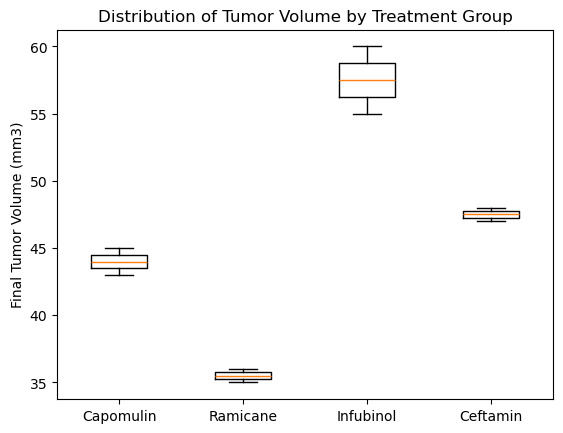

In [190]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=dict(markerfacecolor='red', markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.show()

## Line and Scatter Plots

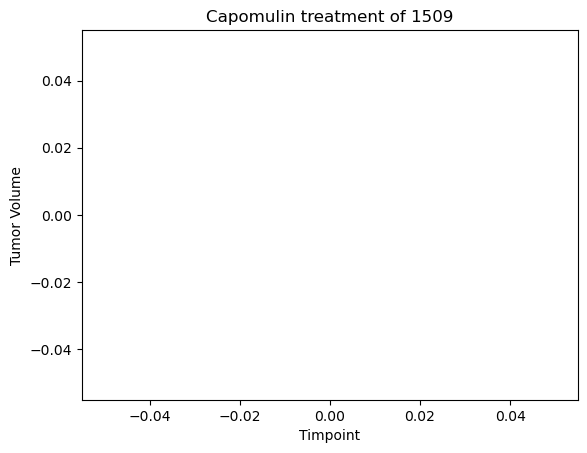

In [194]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table["Mouse ID"] == '1509']

plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timpoint')
plt.ylabel('Tumor Volume')
plt.title('Capomulin treatment of 1509')
plt.show()

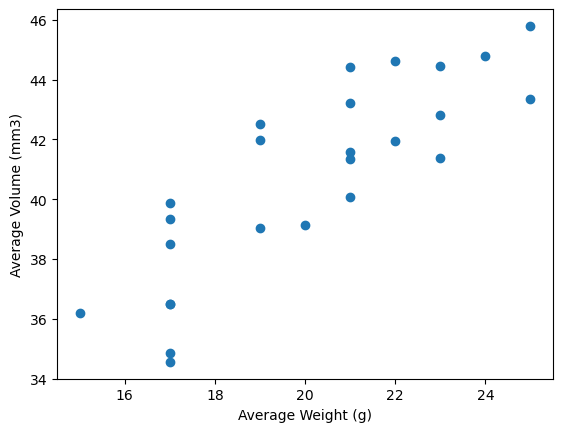

In [162]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']]. mean ()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation coefficient: 0.90
Slope: 4.50, Intercept: 83.50, R-squared: 0.81


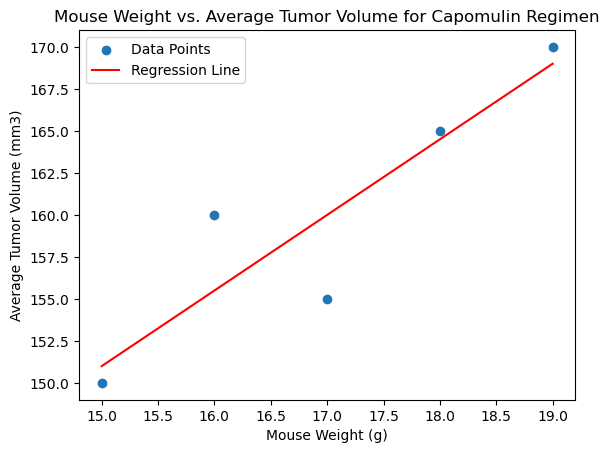

In [187]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#st.pearsonr()
#st.linregress()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Sample data (Replace this with your actual Capomulin regimen data)
# For example purposes, here is a mock DataFrame
data = {
    'Mouse ID': ['m1', 'm2', 'm3', 'm4', 'm5'],
    'Weight': [15, 16, 17, 18, 19],  # in grams
    'Tumor Volume': [150, 160, 155, 165, 170]  # in mm3
}
df = pd.DataFrame(data)

# Extract mouse weight and tumor volume for Capomulin regimen
weight = df['Weight']
tumor_volume = df['Tumor Volume']

# Calculate the correlation coefficient
correlation, _ = st.pearsonr(weight, tumor_volume)
print(f'Correlation coefficient: {correlation:.2f}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(weight, tumor_volume)
print(f'Slope: {slope:.2f}, Intercept: {intercept:.2f}, R-squared: {r_value**2:.2f}')

# Plot the data and the regression line
plt.scatter(weight, tumor_volume, label='Data Points')
plt.plot(weight, intercept + slope * weight, color='red', label='Regression Line')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.legend()
plt.show()